# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the Titanic dataset available at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data).


### Step 1. Import the necessary libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Magic matplotlib command to have plots shown in the notebook
%matplotlib inline
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv) 

In [21]:
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv"

### Step 3. Assign it to a variable titanic 

In [22]:
titanic= pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 4. Set `PassengerId` as the index 

In [23]:
titanic.set_index("PassengerId")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Step 5. Create a pie chart representing the proportion between male/female.

<AxesSubplot:ylabel='Sex'>

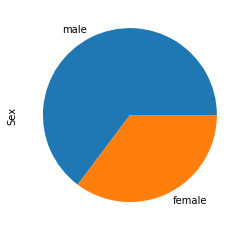

In [24]:
titanic.Sex.value_counts(). plot(kind="pie")

In [25]:
titanic["isMale"]= (titanic.Sex=="male")*1
titanic["isMale"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: isMale, Length: 891, dtype: int32

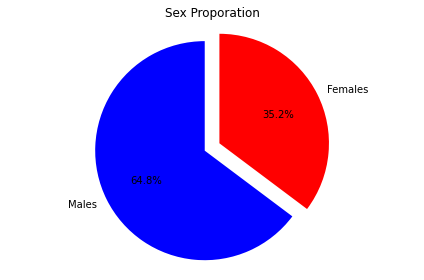

In [52]:
# sum the instanc of male and female
males=(titanic["Sex"] == "male").sum()
females=(titanic["Sex"] == "female").sum()

#put them into a list callesd proporations
proporations= [males, females]

#creat a pie chart
plt.pie(proporations,
        labels=["Males", "Females"],
        shadow= False,
        colors= ["blue", "red"],
        explode=(0.15,0),
        startangle=90,
        autopct="%1.1f%%"
       )
#view the plot drop above
plt.axis("equal")

#set lable
plt.title("Sex Proporation")

# view th plot
plt.tight_layout()
plt.show()


In [18]:
### Step 6. Create a scatter plot of `Fare` and `Age`,differ the dot color by gender.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

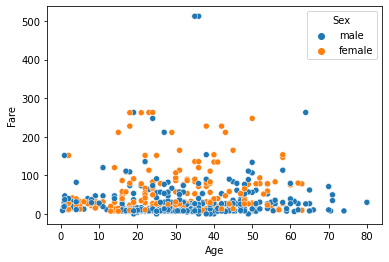

In [26]:
sns.scatterplot(x="Age", y="Fare" , hue="Sex", data=titanic)

(-5.0, 85.0)

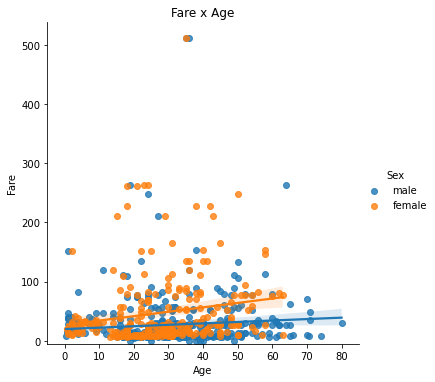

In [41]:
# an other way

#creat the plot using
lm=sns.lmplot(x="Age", y="Fare" , hue="Sex", data=titanic)

#set title
lm.set(title="Fare x Age")

#get the axes object and tweak it
axes=lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Step 7. How many people survived?

In [27]:
titanic.Survived.sum()

342

### Step 8. Create a histogram of `Fare` using `matplotlib`. Use bins of interval 10.

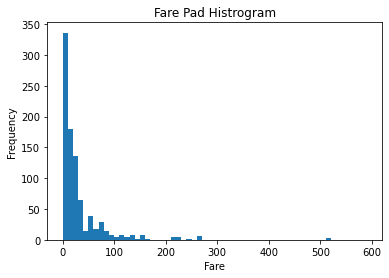

In [49]:
#sort the value from the top to the least value
df= titanic.Fare.sort_values(ascending=False)
df

#creat bins interval using numpy
binsVal= np.arange(0,600,10)
binsVal

#creat the plot
plt.hist(df, bins=binsVal)

#set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Pad Histrogram')

#show the plot
plt.show()

### Step 9. Create a histogram of `Fare` using `seaborn`. Use bins of interval 10.

C:\Users\Mahboubeh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

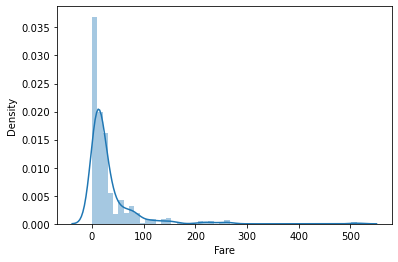

In [29]:
sns.distplot(titanic.Fare)

### BONUS: Create your own question and answer it.

In [ ]:
#https://www.youtube.com/watch?v=CBT0buoF_Ns&t=21s